In [3]:
# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

%matplotlib inline

In [10]:
# Reading and Understanding Data

In [36]:
raw_data = pd.read_csv("Data untuk use case.csv")
raw_data.head()

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data = raw_data.set_index(['CustomerID'])

In [13]:
mapping = {"Gender": {"Male":0, "Female": 1}}
data.replace(mapping, inplace= True)

In [14]:
data.head()

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [15]:
data.describe()

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [16]:
data.nunique()

Gender                       2
Age                         51
Telco Spending (IDR 000)    64
Purchasing power (1-100)    84
dtype: int64

In [17]:
data.isnull().sum()

Gender                      0
Age                         0
Telco Spending (IDR 000)    0
Purchasing power (1-100)    0
dtype: int64

In [18]:
#Pair plotting data

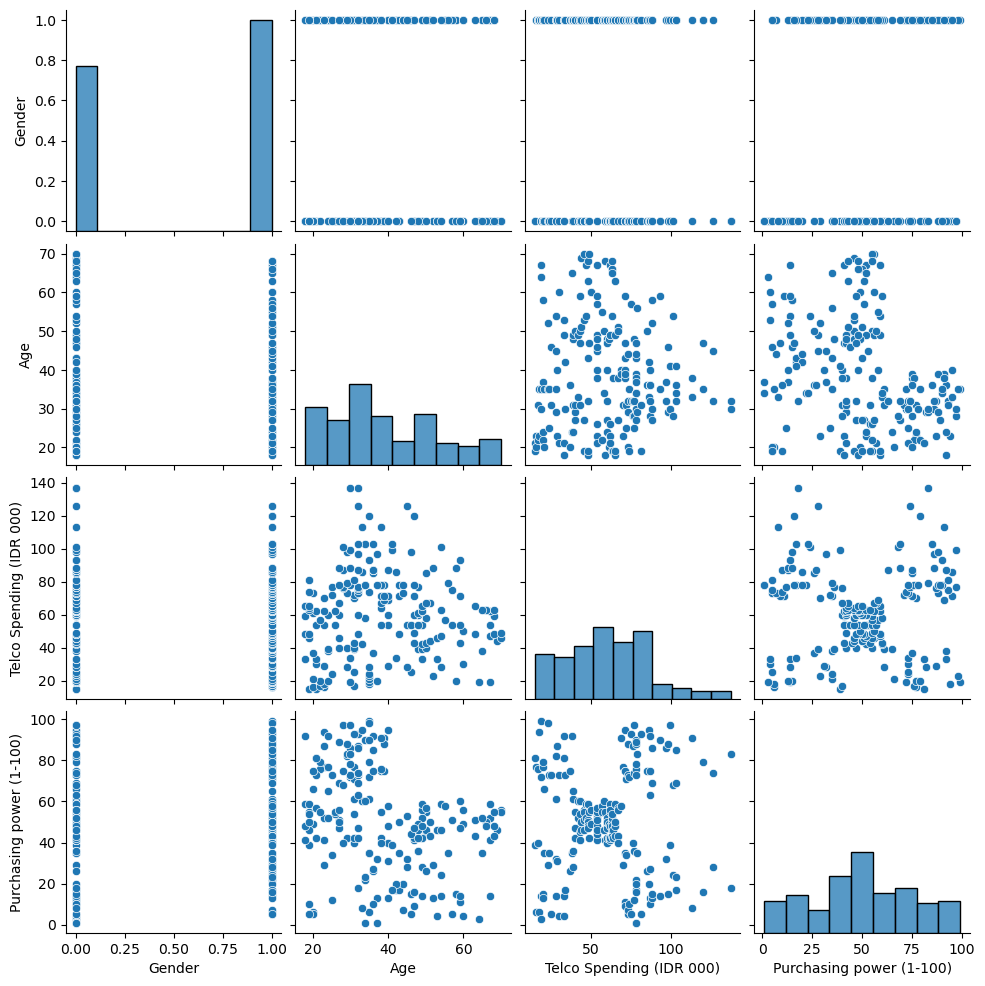

In [19]:
sns.pairplot(data)

In [13]:
# Build Elbow Method graph for identifying number of cluster

Text(0, 0.5, 'WCSS')

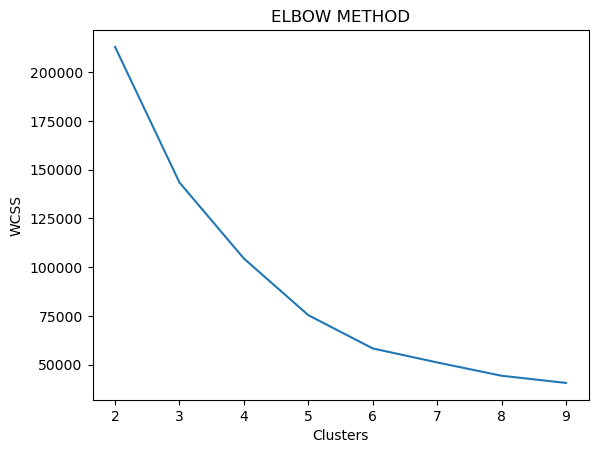

In [20]:
## Building The Elbow Method graph with full data
wcss = []
for i in range (2,10):
    kmeans = KMeans (i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range (2,10), wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

In [21]:
# Silhouette Score for Identifying Number of Cluster

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil =[]
# Number of Cluster in range 2-20
K= range (2,10)
for n in K:
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(data)
    labels = algorithm.labels_
    sil.append(silhouette_score(data, labels, metric= 'euclidean'))

In [23]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.44424291275274114,
 0.45206493204632353,
 0.43949619264530887,
 0.4304396746257457,
 0.41764424180554754]

In [24]:
kmeans = KMeans (6)
kmeans.fit (data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(clusters)
clusters.head(10)

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),prediction
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,2
3,1,20,16,6,4
4,1,23,16,77,2
5,1,31,17,40,4
6,1,22,17,76,2
7,1,35,18,6,4
8,1,23,18,94,2
9,0,64,19,3,4


Text(0.5, 0, 'Purchasing power (1-100)')

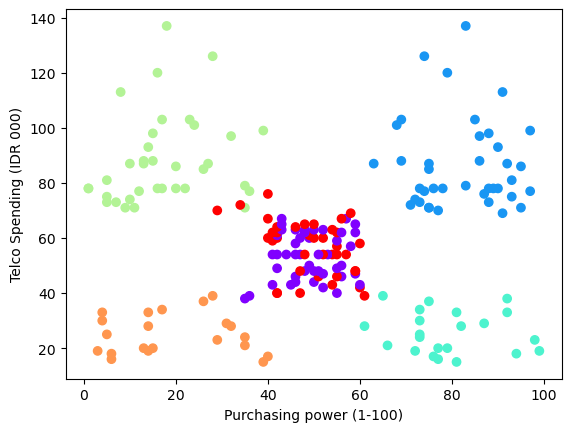

In [25]:
plt.scatter(data['Purchasing power (1-100)'], data ['Telco Spending (IDR 000)'], c= clusters ['prediction'], cmap='rainbow')
plt.ylabel('Telco Spending (IDR 000)')
plt.xlabel('Purchasing power (1-100)')

In [26]:
kmeans = KMeans (5)
kmeans.fit (data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(clusters)
clusters.head()

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),prediction
CustomerID,,,,,
1,0,19,15,39,0
2,0,21,15,81,4
3,1,20,16,6,0
4,1,23,16,77,4
5,1,31,17,40,0


Text(0.5, 0, 'Purchasing power (1-100)')

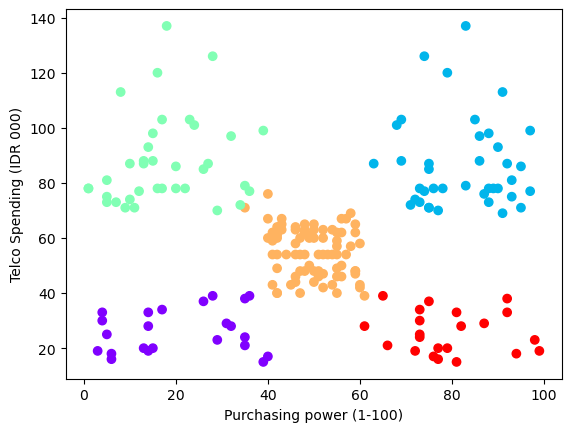

In [27]:
plt.scatter(data['Purchasing power (1-100)'], data ['Telco Spending (IDR 000)'], c= clusters ['prediction'], cmap='rainbow')
plt.ylabel('Telco Spending (IDR 000)')
plt.xlabel('Purchasing power (1-100)')

In [28]:
clusters.groupby('prediction').mean()

,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
prediction,,,,
0,0.608696,45.217391,26.304348,20.913043
1,0.538462,32.692308,86.538462,82.128205
2,0.472222,40.666667,87.750000,17.583333
3,0.587500,42.937500,55.087500,49.712500
4,0.590909,25.272727,25.727273,79.363636


In [29]:
raw_data.to_csv("Data Akhir.csv", index = False)

In [30]:
kmeans = KMeans(5, init ="k-means++", random_state =42)
y_kmeans =kmeans.fit_predict(data)

In [31]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])